# Read and Parse Chainer logs

In [1]:
%matplotlib inline
import re
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import cm
import pandas as pd

In [2]:
!ls cifar*.log

cifar-series-4.log               cifar_series_25run_mose_adam.log
cifar-series.log                 cifar_series_run_25fix.log
cifar_errors.log                 cifar_series_run_DL_25fix.log


## CIFAR100 runs with various batch sizes and learning rates

In [3]:
run_pattern = re.compile(r"^run\s+(\d+)/(\d+)")
output_pattern = re.compile(r"^(\d+)\s+([0-9\.]+)\s+([0-9\.]+)\s+([0-9\.]+)\s+([0-9\.]+)\s+([0-9\.]+)")

In [4]:
logfile="cifar_series_25run_mose_adam.log"
with open(logfile,"r") as f:
    lines = f.readlines()
    batch = 0
    epoch = 0
    ind = 0
    loss = 0
    acc = 0
    learn = 0
    time = 0
    df = pd.DataFrame(data=None,columns=["run","epoch","loss","acc","time"])
    for line in lines:
        s = line.strip()
        m = run_pattern.match(s)        
        if m:
            run = int(m.group(1))
#            learn = float(m.group(2))            
#            run += 1
            #print batch,learn
        else:
            m = output_pattern.match(s)
            if m:
                epoch = int(m.group(1))
                loss = float(m.group(3))
                acc = float(m.group(5))
                time = float(m.group(6))
                #print batch,learn,loss,acc,time
                df.loc[ind] = [run,epoch,loss,acc,time]
                ind += 1

In [5]:
df.head()

,run,epoch,loss,acc,time
0,1.0,1.0,4.55274,0.017021,48.4499
1,1.0,2.0,4.38414,0.021438,96.5507
2,1.0,3.0,4.15817,0.036897,144.5240
3,1.0,4.0,4.05362,0.054808,193.1470
4,1.0,5.0,3.92378,0.066872,241.8760


In [6]:
df_loss = df.pivot(index="run",columns="epoch",values="loss")
df_loss.index = df_loss.index.map(lambda s: "loss"+str(int(s)))
df_loss.head()

epoch,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0
run,,,,,,,,,,
loss1,4.55274,4.38414,4.15817,4.05362,3.92378,3.82106,3.46712,3.24726,3.06345,3.00570
loss2,4.61827,4.62868,4.63756,4.21552,4.71019,3.92262,3.63468,3.44697,3.44128,2.92891
loss3,4.73115,5.31504,4.70606,4.49188,4.33667,3.90824,3.83173,3.72757,3.34381,3.01359
loss4,4.66050,5.02770,4.92328,4.40844,3.88422,3.46701,3.59588,3.19737,3.66928,3.17833
loss5,4.71749,4.36041,4.73827,3.95134,3.89300,3.63495,3.26975,3.82520,3.17030,2.76337


In [8]:
df_acc = df.pivot(index="run",columns="epoch",values="acc")
df_acc.index = df_acc.index.map(lambda s: "acc"+str(int(s)))
df_acc.head()

epoch,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0
run,,,,,,,,,,
acc1,0.017021,0.021438,0.036897,0.054808,0.066872,0.076637,0.125281,0.163350,0.199512,0.215091
acc2,0.009938,0.010024,0.017389,0.036920,0.035421,0.067894,0.107393,0.136742,0.152407,0.231491
acc3,0.010110,0.012552,0.027338,0.031549,0.053464,0.092435,0.105584,0.127183,0.173041,0.229452
acc4,0.010110,0.011075,0.016360,0.038861,0.077585,0.122449,0.121054,0.180417,0.142842,0.209817
acc5,0.009938,0.030584,0.020755,0.059748,0.084180,0.109007,0.158772,0.141797,0.190165,0.267084


In [9]:
df_time = df.pivot(index="run",columns="epoch",values="time")
df_time.index = df_time.index.map(lambda s: "time"+str(int(s)))
df_time.head()

epoch,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0
run,,,,,,,,,,
time1,48.4499,96.5507,144.524,193.147,241.876,290.203,339.001,387.840,436.180,485.024
time2,49.4210,98.1776,146.528,195.330,244.151,292.562,341.398,390.234,438.606,487.460
time3,49.4063,98.1823,146.521,195.336,244.132,292.489,341.372,390.187,438.585,487.395
time4,49.3290,98.1283,146.517,195.348,244.172,292.529,341.370,390.204,438.581,487.397
time5,49.3378,98.1178,146.451,195.250,244.087,292.446,341.261,390.100,438.475,487.288


In [10]:
df_loss.to_csv(logfile+"-loss.csv")
df_acc.to_csv(logfile+"-acc.csv")
df_time.to_csv(logfile+"-time.csv")

In [12]:
def RelativePercentDifference(ser):
    mean = ser.mean()
    ser = ser.apply(lambda x: x/mean*100)
    return ser

In [13]:
df_time["perc"] = df_time[10]
df_time["perc"] = RelativePercentDifference(df_time["perc"])
df_time.head()

epoch,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,perc
run,,,,,,,,,,,
time1,48.4499,96.5507,144.524,193.147,241.876,290.203,339.001,387.840,436.180,485.024,99.633351
time2,49.4210,98.1776,146.528,195.330,244.151,292.562,341.398,390.234,438.606,487.460,100.133753
time3,49.4063,98.1823,146.521,195.336,244.132,292.489,341.372,390.187,438.585,487.395,100.120400
time4,49.3290,98.1283,146.517,195.348,244.172,292.529,341.370,390.204,438.581,487.397,100.120811
time5,49.3378,98.1178,146.451,195.250,244.087,292.446,341.261,390.100,438.475,487.288,100.098421


In [14]:
df_acc["perc"] = df_acc[10]
df_acc["perc"] = RelativePercentDifference(df_acc["perc"])
df_loss["perc"] = df_loss[10]
df_loss["perc"] = RelativePercentDifference(df_loss["perc"])
df_loss.head()

epoch,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,perc
run,,,,,,,,,,,
loss1,4.55274,4.38414,4.15817,4.05362,3.92378,3.82106,3.46712,3.24726,3.06345,3.00570,100.258844
loss2,4.61827,4.62868,4.63756,4.21552,4.71019,3.92262,3.63468,3.44697,3.44128,2.92891,97.697419
loss3,4.73115,5.31504,4.70606,4.49188,4.33667,3.90824,3.83173,3.72757,3.34381,3.01359,100.522025
loss4,4.66050,5.02770,4.92328,4.40844,3.88422,3.46701,3.59588,3.19737,3.66928,3.17833,106.017132
loss5,4.71749,4.36041,4.73827,3.95134,3.89300,3.63495,3.26975,3.82520,3.17030,2.76337,92.175627


In [15]:
df_acc.head()

epoch,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,perc
run,,,,,,,,,,,
acc1,0.017021,0.021438,0.036897,0.054808,0.066872,0.076637,0.125281,0.163350,0.199512,0.215091,94.603496
acc2,0.009938,0.010024,0.017389,0.036920,0.035421,0.067894,0.107393,0.136742,0.152407,0.231491,101.816709
acc3,0.010110,0.012552,0.027338,0.031549,0.053464,0.092435,0.105584,0.127183,0.173041,0.229452,100.919896
acc4,0.010110,0.011075,0.016360,0.038861,0.077585,0.122449,0.121054,0.180417,0.142842,0.209817,92.283832
acc5,0.009938,0.030584,0.020755,0.059748,0.084180,0.109007,0.158772,0.141797,0.190165,0.267084,117.471582


In [16]:
def plotBox(df):
    meanlineprops = dict(linewidth=1, color=(0.2,.5,.8),linestyle="--")
    color = dict(medians=(1,.7,.3))
    df.plot.box(showmeans=True, meanline=True, 
                            color=color,meanprops=meanlineprops)
    ax = plt.gca()
    return ax

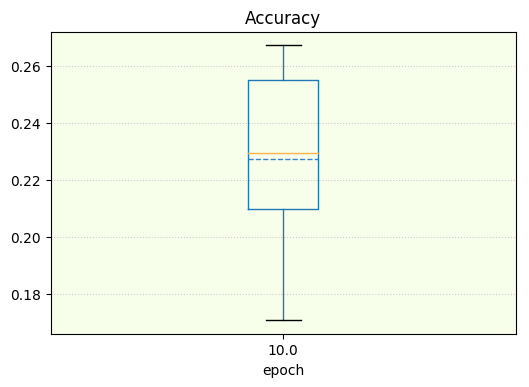

In [18]:
ax = plotBox(df_acc[10])
ax.set_title("Accuracy")
ax.yaxis.grid(linestyle=":",color="#cccccc")
ax.set_xlabel("epoch")
#major = np.arange(0.08,0.19,0.01)
#ax.set_yticks(major)
ax.set_facecolor("#CBFF7725")



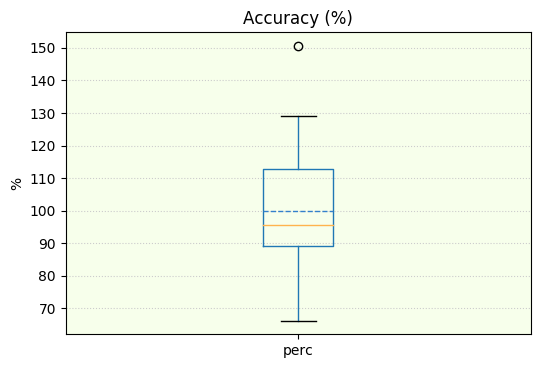

In [36]:
ax = plotBox(df_acc["perc"])
ax.yaxis.grid(linestyle=":",color="#cccccc")
ax.set_title("Accuracy (%)")
ax.set_ylabel("%")
major = np.arange(70,160,10)
ax.set_yticks(major)
ax.set_facecolor("#CBFF7725")

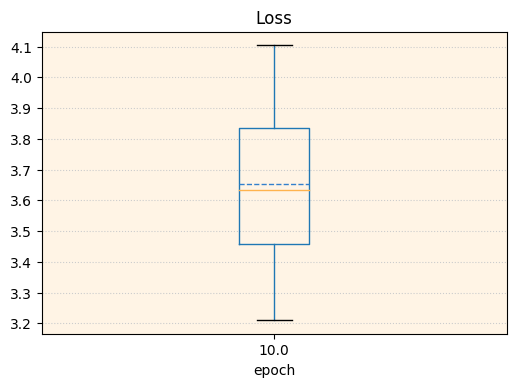

In [39]:
ax = plotBox(df_loss[10])
ax.set_title("Loss")
ax.yaxis.grid(linestyle=":",color="#cccccc")
ax.set_xlabel("epoch")
major = np.arange(3.2,4.2,.1)
ax.set_yticks(major)
ax.set_facecolor("#FFAC3620")

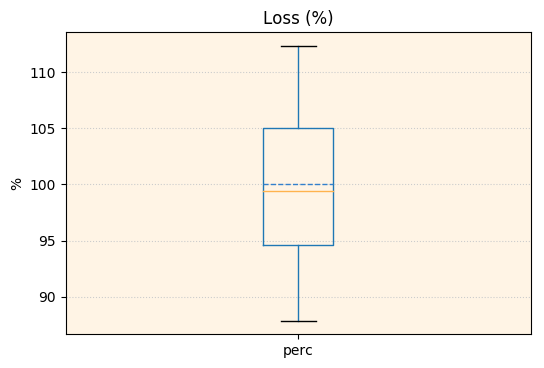

In [27]:
ax = plotBox(df_loss["perc"])
ax.yaxis.grid(linestyle=":",color="#cccccc")
ax.set_title("Loss (%)")
ax.set_ylabel("%")
ax.set_facecolor("#FFAC3620")

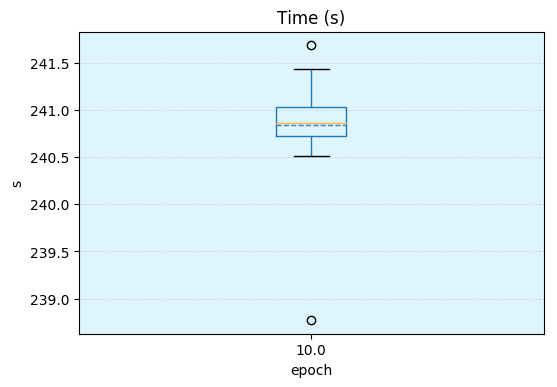

In [28]:
#df_time[10].plot.box(title="Time (s)")
ax = plotBox(df_time[10])
ax.yaxis.grid(linestyle=":",color="#cccccc")
ax.set_ylabel("s")
ax.set_title("Time (s)")
ax.set_xlabel("epoch")
ax.set_facecolor("#00B7FA20")

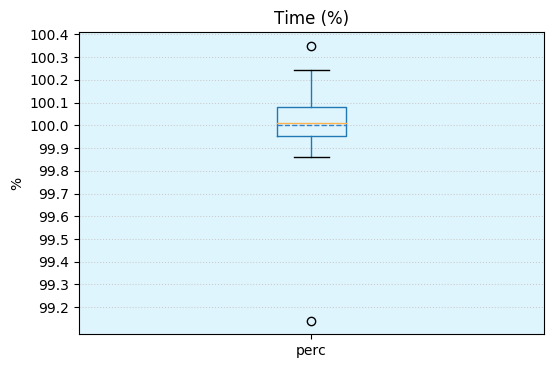

In [40]:
ax = plotBox(df_time["perc"])
ax.yaxis.grid(linestyle=":",color="#cccccc")
ax.set_ylabel("%")
ax.set_title("Time (%)")
major = np.arange(99.2,100.5,0.1)
ax.set_yticks(major)
ax.set_facecolor("#00B7FA20")